In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import sklearn.datasets
from sklearn.metrics import accuracy_score
import warnings
sns.set()

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=DeprecationWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

# The Iris Dataset

In [6]:
df = pd.read_csv('data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Hierarchical Clustering

In [7]:
from sklearn.cluster import AgglomerativeClustering

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
import plotly.figure_factory as ff

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',]
smaller_df = df.sample(frac=0.2)
fig = ff.create_dendrogram(smaller_df[features], orientation='left', color_threshold=2.55, labels=smaller_df['class'].values)
fig.show()

In [10]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the cor responding dendrogram

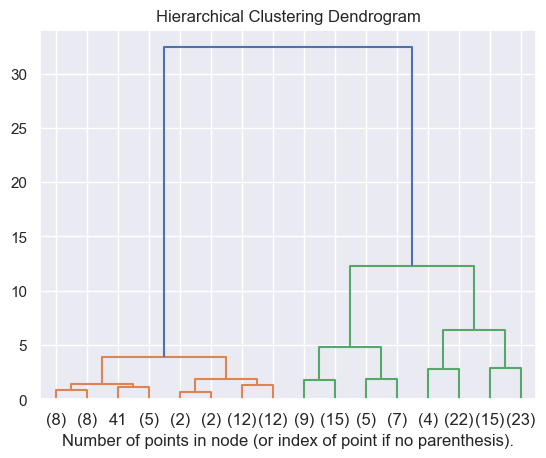

In [11]:
# courtosy sklearn.org
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


X = df[features]

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

{'icoord': [[85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [90.0, 90.0, 110.0, 110.0],
  [75.0, 75.0, 100.0, 100.0],
  [65.0, 65.0, 87.5, 87.5],
  [55.0, 55.0, 76.25, 76.25],
  [45.0, 45.0, 65.625, 65.625],
  [35.0, 35.0, 55.3125, 55.3125],
  [25.0, 25.0, 45.15625, 45.15625],
  [15.0, 15.0, 35.078125, 35.078125],
  [5.0, 5.0, 25.0390625, 25.0390625],
  [125.0, 125.0, 135.0, 135.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [155.0, 155.0, 172.5, 172.5],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [270.0, 270.0, 290.0, 290.0],
  [242.5, 242.5, 280.0, 280.0],
  [225.0, 225.0, 261.25, 261.25],
  [215.0, 215.0, 243.125, 243.125],
  [205.0, 205.0, 229.0625, 229.0625],
  [195.0, 195.0, 217.03125, 217.03125],
  [163.75, 163.75, 206.015625, 206.015625],
  [145.0, 145.0, 184.8828125, 184.8828125],
  [130.0, 130.0, 164.94140625, 164.94140625],
  [15.01953125, 15.01953125, 147

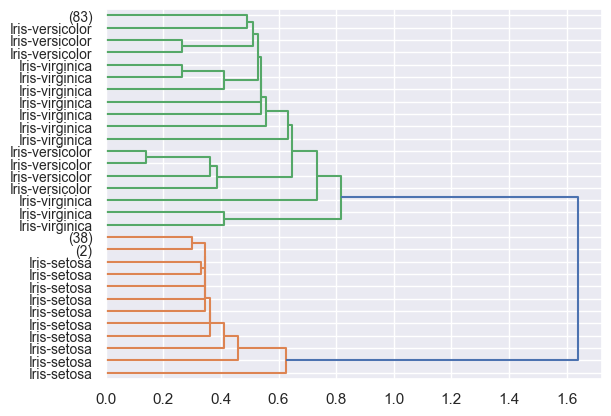

In [12]:
from scipy.cluster import hierarchy
h_df = df[features+['class']]
h_df = h_df.set_index('class')
h_df
Z = hierarchy.linkage(h_df)
# plt.figure(figsize=(8, 15))

# hierarchy.dendrogram(Z, p=30, labels=h_df.index, orientation='right');

hierarchy.dendrogram(
    Z,
    p=10,
    labels=h_df.index,
    truncate_mode='level',
    color_threshold=1.3,
    get_leaves=True,
    orientation='right',
    count_sort=True,
    distance_sort=False,
    show_leaf_counts=True,
    no_plot=False,
    no_labels=False,
    leaf_font_size=None,
    leaf_rotation=None,
    leaf_label_func=None,
    show_contracted=False,
    link_color_func=None,
    ax=None,
    above_threshold_color='C0',
)

In [13]:
newmodel = AgglomerativeClustering(n_clusters=3)
df['heirarchical_labels']=newmodel.fit_predict(X)


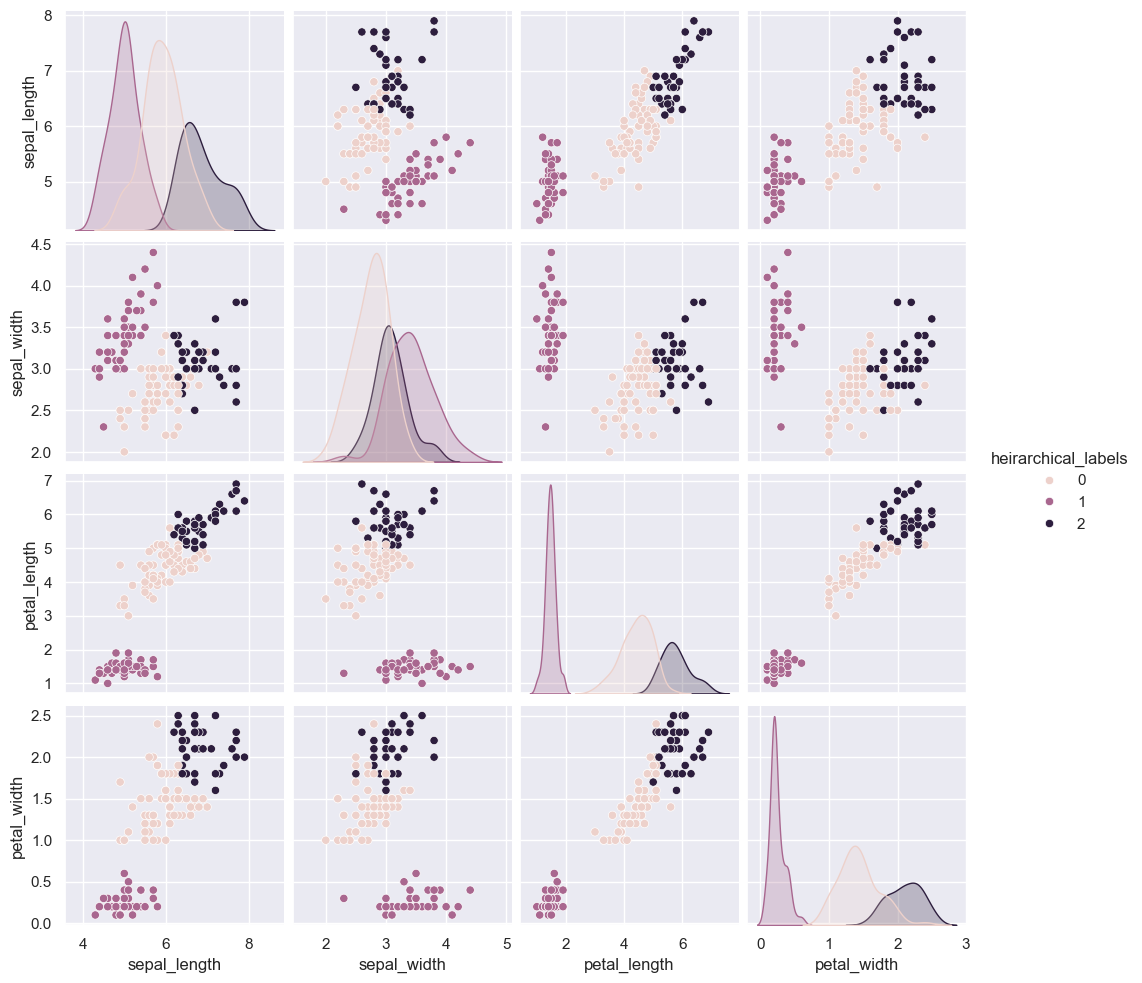

In [14]:
# cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']
sns.pairplot(df, vars=features,  hue='heirarchical_labels')

<Axes: title={'center': 'Y-Predicted'}, xlabel='petal_width', ylabel='Count'>

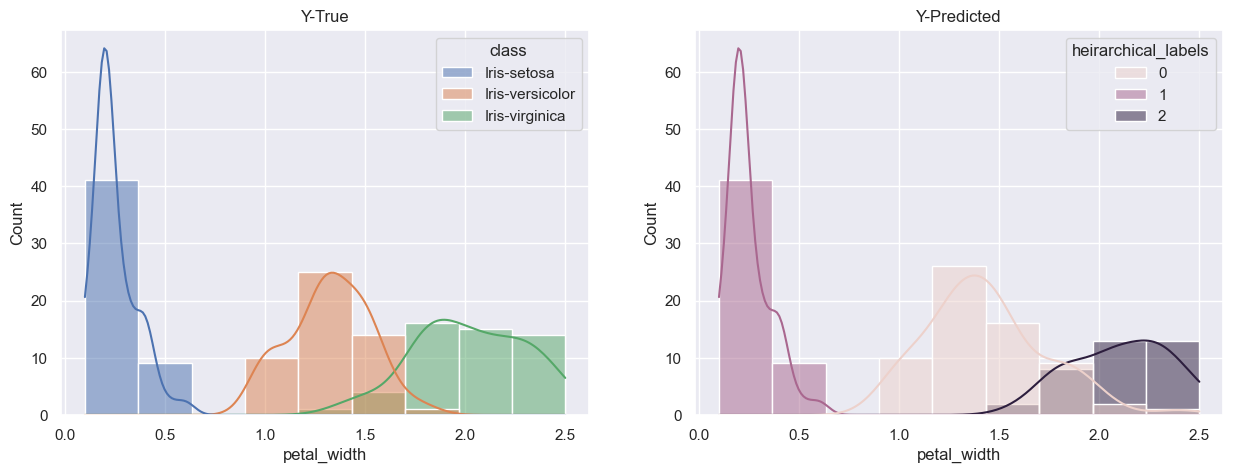

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].set_title('Y-True')
sns.histplot(df, x='petal_width', hue='class', kde=True, ax=axes[0])

axes[1].set_title('Y-Predicted')
sns.histplot(df, x='petal_width', hue='heirarchical_labels', kde=True, ax=axes[1])



In [16]:
cluster_to_class_map = {
    1: 'Iris-setosa',
    0: 'Iris-versicolor',
    2: 'Iris-virginica'
}

df['heirarchical_labels_names'] = df.heirarchical_labels.map(cluster_to_class_map)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class,heirarchical_labels,heirarchical_labels_names
0,5.1,3.5,1.4,0.2,Iris-setosa,1,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,1,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,1,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,1,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,1,Iris-setosa


In [18]:
accuracy_score(df.heirarchical_labels_names, df['class'])

0.8933333333333333

DBSCAN  doesn't do a great job, since the metrics of two of the species are spatially similar.  So, it finds 2 clusters rather than 3

# Market Analysis with APRIORI:  Coffee Shop Orders


In [27]:
# !pip install mlxtend
# !pip install networkx
import numpy as np 
import pandas as pd 
from mlxtend.frequent_patterns import apriori, association_rules 

In [28]:
df = pd.read_csv('data/Coffe Shop Sales.xlsx - MBA_Master.csv')
df.head()

,transaction_number,amount,item
0,6,1,Latte Hot
1,6,1,Americano Hot
2,6,1,V60
3,6,1,Brownies
4,7,1,V60


In [29]:
print(df.item.value_counts().head())
print(df.transaction_number.value_counts().head())
df.duplicated().sum()
df[df.duplicated()]

# df.groupby('amount').count()

item
Latte Iced        1328
Cappucino Hot      649
Latte Hot          523
Americano Iced     468
V60                435
Name: count, dtype: int64
transaction_number
3153    11
1096    10
3093     9
2562     9
2650     9
Name: count, dtype: int64


,transaction_number,amount,item
36,781,1,Flat White Hot
38,781,1,Flat White Hot
46,785,1,V60
49,786,1,Cappucino Hot
60,795,1,Americano Iced
...,...,...,...
6499,5751,1,V60
6513,5770,1,Americano Iced
6536,5785,1,EspressoHot
6539,5788,1,Latte Iced


In [30]:
df.groupby('item')['amount'].sum().sort_values(ascending=False).head()

item
Latte Iced        1453
Cappucino Hot      694
Latte Hot          570
Americano Iced     510
V60                446
Name: amount, dtype: int64

In [31]:
df.isnull().sum()


transaction_number    0
amount                0
item                  0
dtype: int64

In [32]:
df[df.duplicated()]

,transaction_number,amount,item
36,781,1,Flat White Hot
38,781,1,Flat White Hot
46,785,1,V60
49,786,1,Cappucino Hot
60,795,1,Americano Iced
...,...,...,...
6499,5751,1,V60
6513,5770,1,Americano Iced
6536,5785,1,EspressoHot
6539,5788,1,Latte Iced


In [33]:
df.head()

,transaction_number,amount,item
0,6,1,Latte Hot
1,6,1,Americano Hot
2,6,1,V60
3,6,1,Brownies
4,7,1,V60


In [34]:
df_pivot = df.pivot_table(
    index='transaction_number',
    columns ='item',
    values = 'amount',
    aggfunc='sum').fillna(0)

print("Dataset size: ", df_pivot.shape)
df_pivot

Dataset size:  (3131, 45)


item,Almond Croisant,Americano Hot,Americano Iced,Apple Turnover,Blueberry Muffins,Brownies,Cake Of The Day,Cappucino Hot,Cappucino Iced,Carrot cake,...,Mochaccino Iced,Pain Au Chocolat,Pain Au Suisse,PiccoloHot,PiccoloIced,Pistachio Croissant,Plain Croisant,Tiramisu,Tiramisu cake,V60
transaction_number,,,,,,,,,,,,,,,,,,,,,
6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Show what the top transactions with the highest amounts look like transposed.
df_pivot[df_pivot.select_dtypes(np.number)
                 .apply(lambda x: 4 < x, axis=1)
                 .any(axis=1)] \
        .T \
        .style \
        .background_gradient(axis=None) \
        .format('{:,.0f}')

transaction_number,1096,1160,1337,2296,2430,2620,2650,3157,4708,5580,5666
item,,,,,,,,,,,
Almond Croisant,0,0,1,0,0,0,0,0,5,0,0
Americano Hot,2,0,1,0,0,1,0,0,1,0,1
Americano Iced,0,0,0,0,0,0,1,0,0,0,0
Apple Turnover,0,0,0,0,0,0,0,0,0,0,0
Blueberry Muffins,0,0,0,0,0,0,0,0,0,0,0
Brownies,0,0,0,0,0,0,0,0,1,0,0
Cake Of The Day,0,0,0,0,0,1,1,0,0,0,0
Cappucino Hot,2,0,0,0,0,5,0,0,0,0,1
Cappucino Iced,0,0,0,0,5,0,0,0,0,0,0


In [36]:
def encode(x):
    if x <= 0:
        return 0
    else:
        return 1

df_pivot = df_pivot.map(encode)
df_pivot.head()

item,Almond Croisant,Americano Hot,Americano Iced,Apple Turnover,Blueberry Muffins,Brownies,Cake Of The Day,Cappucino Hot,Cappucino Iced,Carrot cake,...,Mochaccino Iced,Pain Au Chocolat,Pain Au Suisse,PiccoloHot,PiccoloIced,Pistachio Croissant,Plain Croisant,Tiramisu,Tiramisu cake,V60
transaction_number,,,,,,,,,,,,,,,,,,,,,
6,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
441,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# our minimum support
support = 0.01 
frequent_items = apriori(
    df_pivot, 
    min_support=support, 
    use_colnames=True)


frequent_items.sort_values('support', ascending=False)


/opt/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets
14,0.357394,(Latte Iced)
5,0.188758,(Cappucino Hot)
13,0.146279,(Latte Hot)
2,0.136378,(Americano Iced)
24,0.121048,(V60)
...,...,...
38,0.011179,"(Americano Iced, V60)"
51,0.010540,"(Decaf Coffee, Latte Hot)"
34,0.010540,"(Americano Iced, Cake Of The Day)"
54,0.010540,"(Pain Au Chocolat, Latte Hot)"


"Lift" is the ratio of the target reponse given the antecedent relative to no condition. In conditional probability speak this is:
$$
L = \frac{P_{A|B}}{P_B}
$$
High lift suggests that the products tend to purchased together

In [38]:
metric = 'lift'
min_treshold = 1

rules = association_rules(
    frequent_items, 
    metric=metric, 
    min_threshold=min_treshold)


cols_to_keep = ['antecedents','consequents','support','confidence','lift']

rules = rules[cols_to_keep]
rules.reset_index(drop=True).sort_values('confidence',ascending=False, inplace = True)
rules

,antecedents,consequents,support,confidence,lift
0,(Almond Croisant),(Cappucino Iced),0.011498,0.116505,1.021783
1,(Cappucino Iced),(Almond Croisant),0.011498,0.100840,1.021783
2,(Pain Au Chocolat),(Almond Croisant),0.014372,0.214286,2.171290
3,(Almond Croisant),(Pain Au Chocolat),0.014372,0.145631,2.171290
4,(Cappucino Hot),(Americano Hot),0.014692,0.077834,1.154971
5,(Americano Hot),(Cappucino Hot),0.014692,0.218009,1.154971
6,(Americano Hot),(Latte Hot),0.013095,0.194313,1.328370
7,(Latte Hot),(Americano Hot),0.013095,0.089520,1.328370
8,(Americano Iced),(Cappucino Iced),0.015650,0.114754,1.006429
9,(Cappucino Iced),(Americano Iced),0.015650,0.137255,1.006429


In [39]:
# First we build a network from the association rule data

import networkx as nx


### THIS IS TOO CONFUSING FOR KIDS 
from_nodes = [list(x)[0] for x in rules.antecedents]
from_nodes
from_nodes = rules.antecedents
# to_nodes = [list(x)[0] for x in rules.consequents]
to_nodes = rules.consequents
# connections = zip(from_nodes, to_nodes)

connections = []

for from_node, to_node in zip(from_nodes, to_nodes):
    connections.append([from_node, to_node])

G = nx.MultiDiGraph()
G.add_edges_from(connections)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

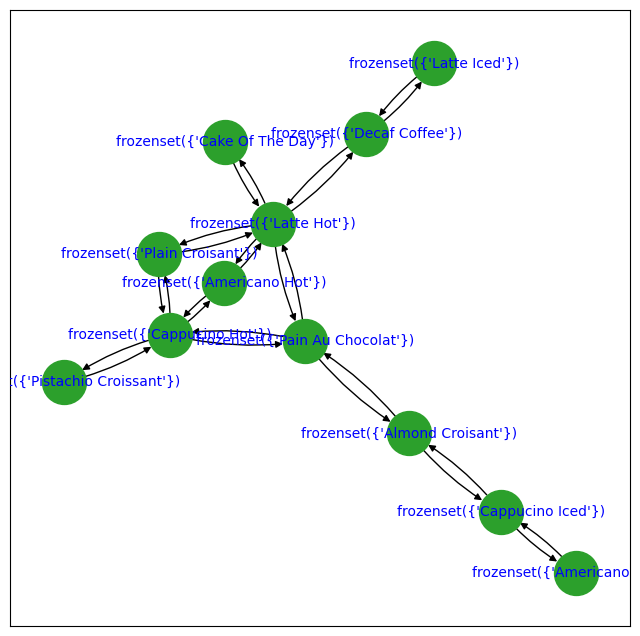

In [40]:
import matplotlib.pyplot as plt
plt.figure(1,figsize=(8,8))
nx.draw_networkx(G,
                 arrows=True,
                 node_size=1000,
                 font_size=10, 
                 node_color="tab:green", 
                 font_color='blue', 
                 connectionstyle='arc3, rad=0.1')


Here, we see that the arrows flow both ways.  This shouldn't be suprising since the data contains purchases that happen at the same time.  

In [41]:
rules.head()

,antecedents,consequents,support,confidence,lift
0,(Almond Croisant),(Cappucino Iced),0.011498,0.116505,1.021783
1,(Cappucino Iced),(Almond Croisant),0.011498,0.100840,1.021783
2,(Pain Au Chocolat),(Almond Croisant),0.014372,0.214286,2.171290
3,(Almond Croisant),(Pain Au Chocolat),0.014372,0.145631,2.171290
4,(Cappucino Hot),(Americano Hot),0.014692,0.077834,1.154971


In [42]:
rules_even = rules.iloc[::2, :].copy() #  keep only even rows

rules_even.antecedents= [list(x)[0] for x in rules_even.antecedents]  # get rid of frozensets
rules_even.consequents= [list(x)[0] for x in rules_even.consequents]  # get rid of frozensets


rules_even['connections'] = rules_even['antecedents']+'<->'+rules_even['consequents']
rules_even= rules_even.sort_values('lift', ascending = False)
rules_even

,antecedents,consequents,support,confidence,lift,connections
2,Pain Au Chocolat,Almond Croisant,0.014372,0.214286,2.171290,Pain Au Chocolat<->Almond Croisant
18,Decaf Coffee,Latte Hot,0.010540,0.266129,1.819323,Decaf Coffee<->Latte Hot
16,Cappucino Hot,Plain Croisant,0.015969,0.084602,1.408989,Cappucino Hot<->Plain Croisant
24,Plain Croisant,Latte Hot,0.011817,0.196809,1.345431,Plain Croisant<->Latte Hot
20,Latte Iced,Decaf Coffee,0.018844,0.052726,1.331323,Latte Iced<->Decaf Coffee
6,Americano Hot,Latte Hot,0.013095,0.194313,1.328370,Americano Hot<->Latte Hot
12,Cappucino Hot,Pain Au Chocolat,0.014692,0.077834,1.160471,Cappucino Hot<->Pain Au Chocolat
4,Cappucino Hot,Americano Hot,0.014692,0.077834,1.154971,Cappucino Hot<->Americano Hot
14,Cappucino Hot,Pistachio Croissant,0.011179,0.059222,1.090724,Cappucino Hot<->Pistachio Croissant
22,Pain Au Chocolat,Latte Hot,0.010540,0.157143,1.074267,Pain Au Chocolat<->Latte Hot


Text(0.5, 1.0, 'Coffee Shop Product Lift')

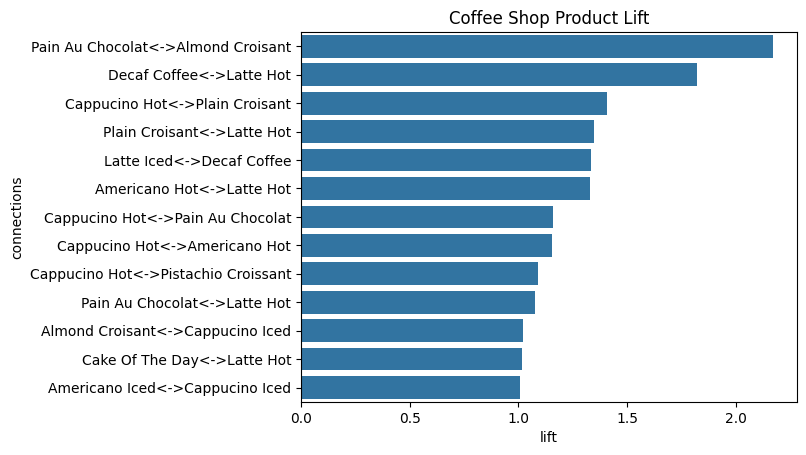

In [43]:
import seaborn as sns
sns.barplot(rules_even, y="connections", x="lift").set_title('Coffee Shop Product Lift')

Apparently, the sweet tooth wins out!  